In [2]:
import numpy as np
%matplotlib inline
import Corrfunc

import utils
import plotter

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

In [3]:
def plot_cf_err(rs, cf_arrs, r_true, cf_true, labels, colors):
    
    if np.array(rs).ndim == 1:
        rs = [rs]
    if np.array(cf_arrs).ndim == 2:
        cf_arrs = np.array([cf_arrs])
    
    cfs_mean = []
    error_regions = []
    for cfs in cf_arrs:
        print(np.array(cfs).shape)
        mean = np.mean(cfs, axis=0)
        cfs_mean.append(mean)
        std = np.std(cfs, axis=0)
        error_regions.append([mean-std, mean+std])
    
    print(np.array(rs).shape)
    print(np.array(cfs_mean).shape)
    plotter.plot_cf_cont(rs, cfs_mean, r_true, cf_true, labels, colors, error_regions=error_regions)

(100, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
rmse: True
plotting


(-0.000827400953821722, 0.02100287926962041)

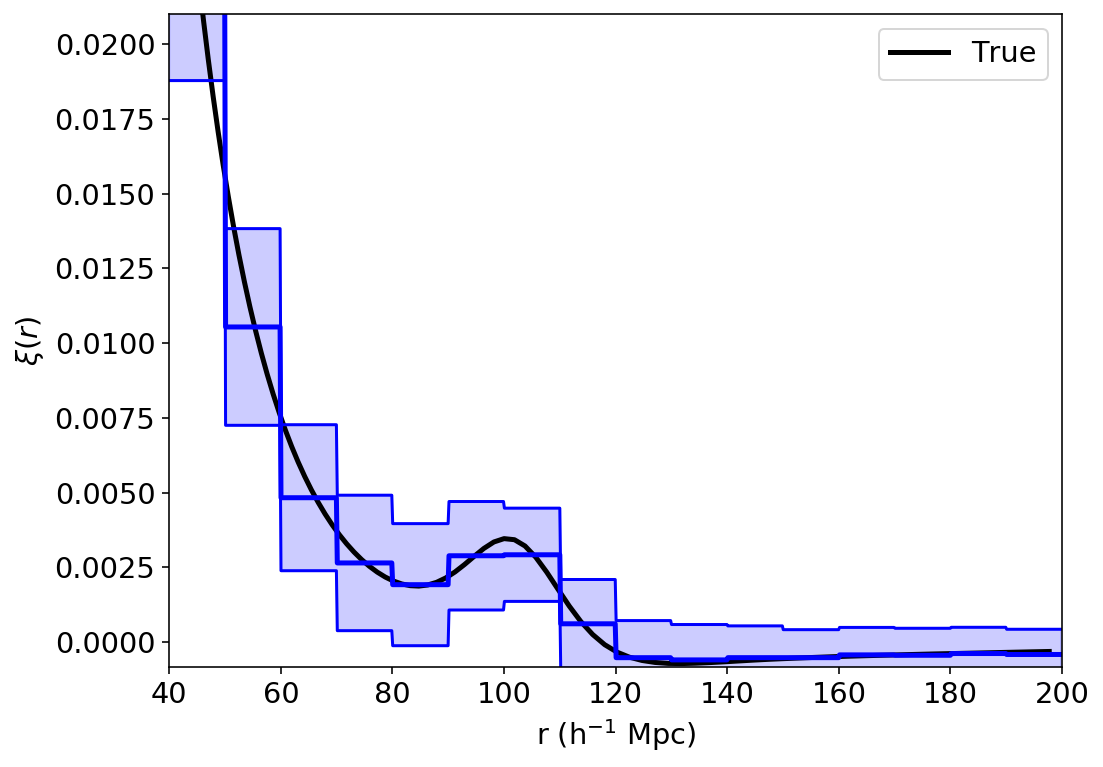

In [4]:
#cat_tag = 'test'
#cat_tag = '_L750_N125k'
cat_tag = '_L750_n1e-4'
cf_tag = '_tophat_bw10'
Nrealizations = 100
cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

labels = [cf_tag]
colors = ['blue']
#plt.figure(figsize=(10,8))
xis = []

for Nr in range(Nrealizations):
    cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tag, cat_tag, Nr)
    r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
    xis.append(xi)
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)

b1 = 1.5    
xi_true *= b1**2
plot_cf_err(r_avg, xis, r_true, xi_true, labels, colors)


#plt.xscale('log')
#plt.yscale('log')
plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))
#plt.xlim(min(r_avg), max(r_avg))
#plt.ylim(min(xi), max(xi))

(-0.0008365369486167396, 0.021026480444039874)

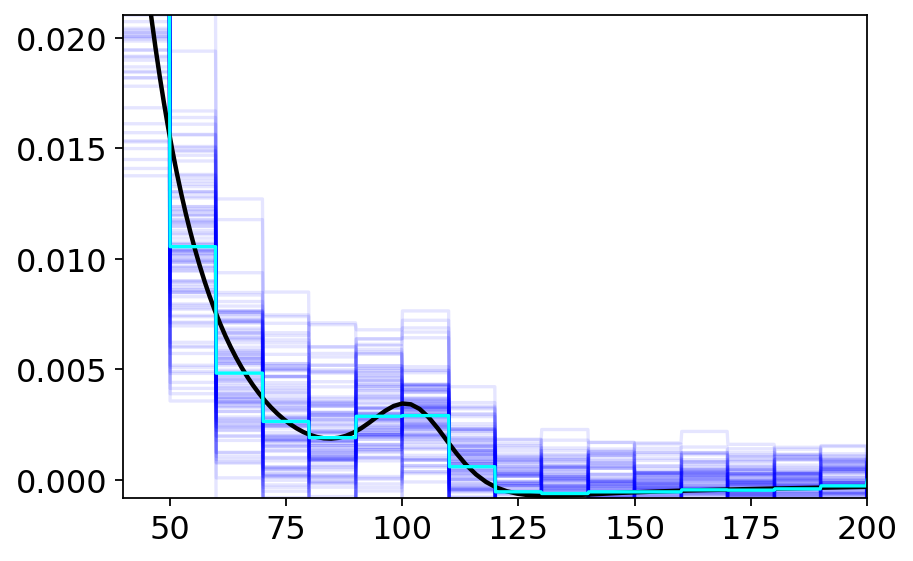

In [9]:
#cat_tag = 'test'
#cat_tag = '_L750_N125k'
cat_tag = '_L750_n1e-4'
cf_tag = '_tophat_bw10'
Nrealizations = 100
cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

#plt.figure(figsize=(10,8))
xis = []

for Nr in range(Nrealizations):
    cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tag, cat_tag, Nr)
    r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
    xis.append(xi)
    
    # true
    true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
    r_true, xi_true = np.loadtxt(true_fn, unpack=True)
    b1 = 1.5

    plt.plot(r_avg, xi, color='blue', alpha = 0.1)

    
xi_avg = np.mean(np.array(xis), axis=0)
plt.plot(r_true, xi_true*b1**2, color='k', lw=2)
plt.plot(r_avg, xi_avg, color='cyan', lw=1.5)


#plt.xscale('log')
#plt.yscale('log')
plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))
#plt.xlim(min(r_avg), max(r_avg))
#plt.ylim(min(xi), max(xi))

(1, 1000)
(1, 1000)
(1, 1000)
rmse: True
plotting


(-0.0022753372256822946, 0.020303756032771902)

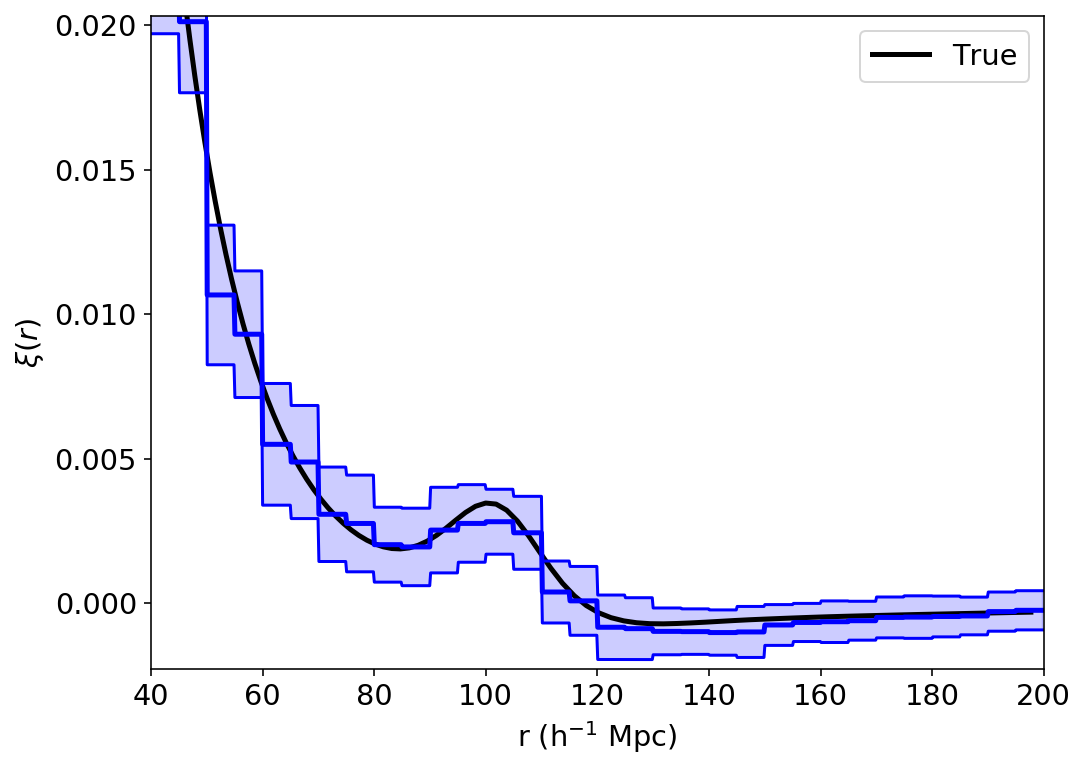

In [27]:
cat_tag = '_L750_N125k'
#cat_tag = '_L750_n1e-4'
cf_tag = '_tophat_bw10'
Nrealizations = 15
cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

labels = [cf_tag]
colors = ['blue']
xis = []
for Nr in range(Nrealizations):
    cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tag, cat_tag, Nr)
    r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
    xis.append(xi)
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)

b1 = 1.5    
xi_true *= b1**2

plot_cf_err(r_avg, xis, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))


(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.0017320926477309984, 0.02855325645403961)

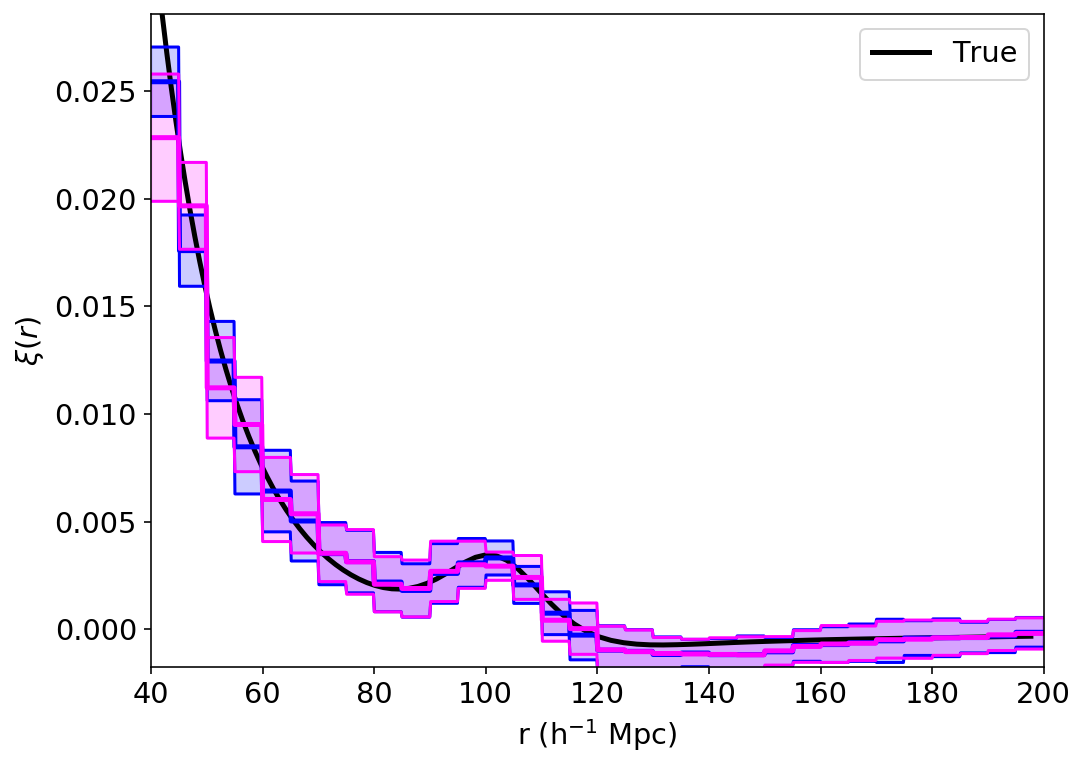

In [24]:
cat_tag = '_L750_N125k'
#cat_tag = '_L750_n1e-4'

cf_tags = ['_tophat_bw5', '_tophat_bw10']
labels = cf_tags
colors = ['blue', 'magenta']
Nrealizations = 10



cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

(3, 1000)
(3, 1000)
(3, 1000)
rmse: True
plotting


(-0.0008365369486167396, 0.021026480444039874)

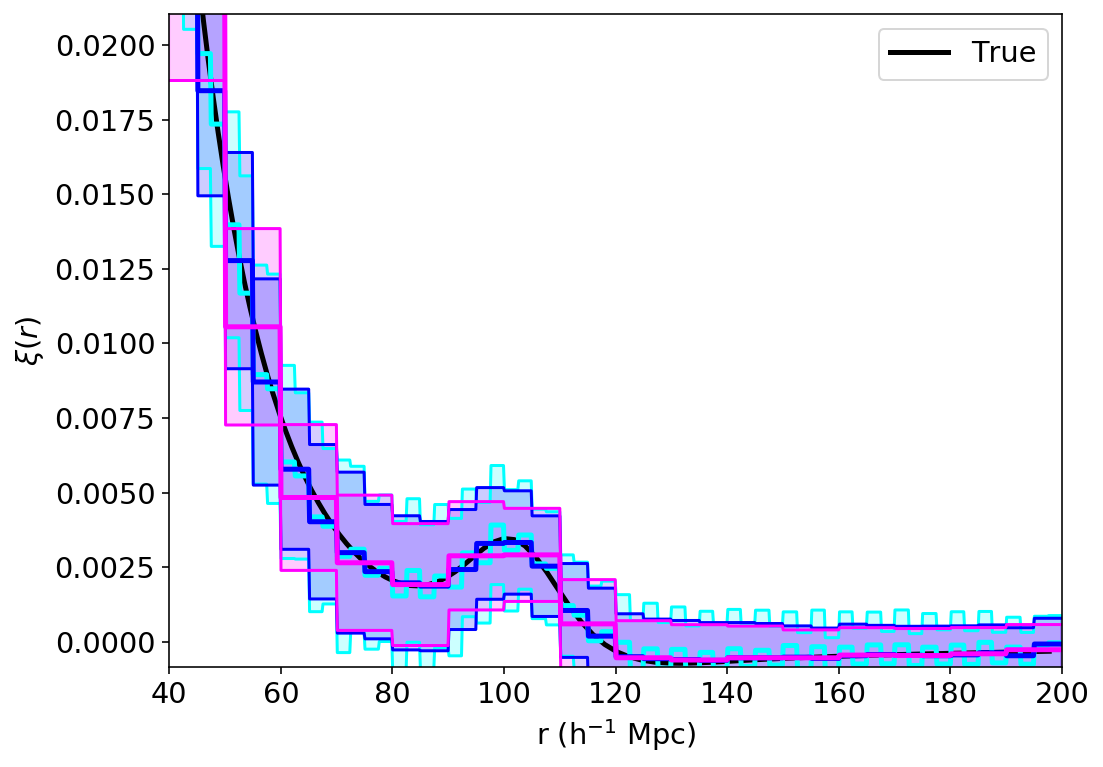

In [28]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_tophat_bw2.5', '_tophat_bw5', '_tophat_bw10']
labels = cf_tags
colors = ['cyan', 'blue', 'magenta']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

(99, 1000)
(99, 1000)
(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.0032421904725877092, 0.03390951585473312)

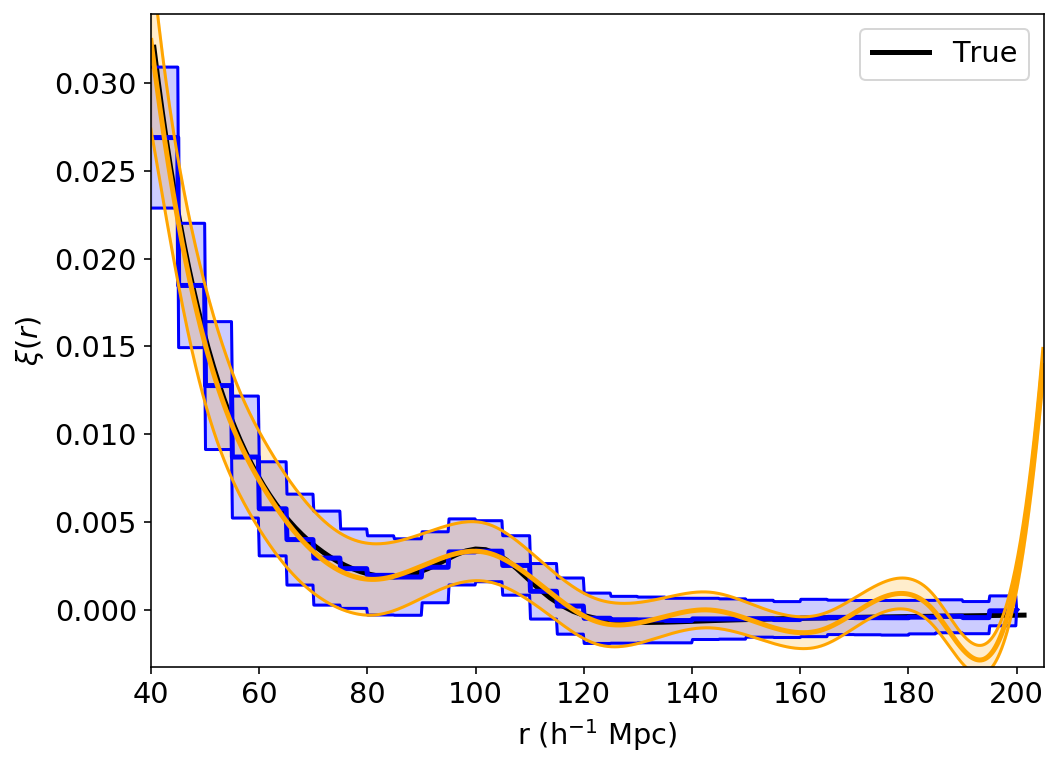

In [89]:
cat_tag = '_L750_n1e-4'

cf_tags = [ '_tophat_bw5', '_spline3_bw15']
labels = cf_tags
colors = ['blue','orange']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        if Nr==46:
            continue
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.003157204220353038, 0.017815884424403183)

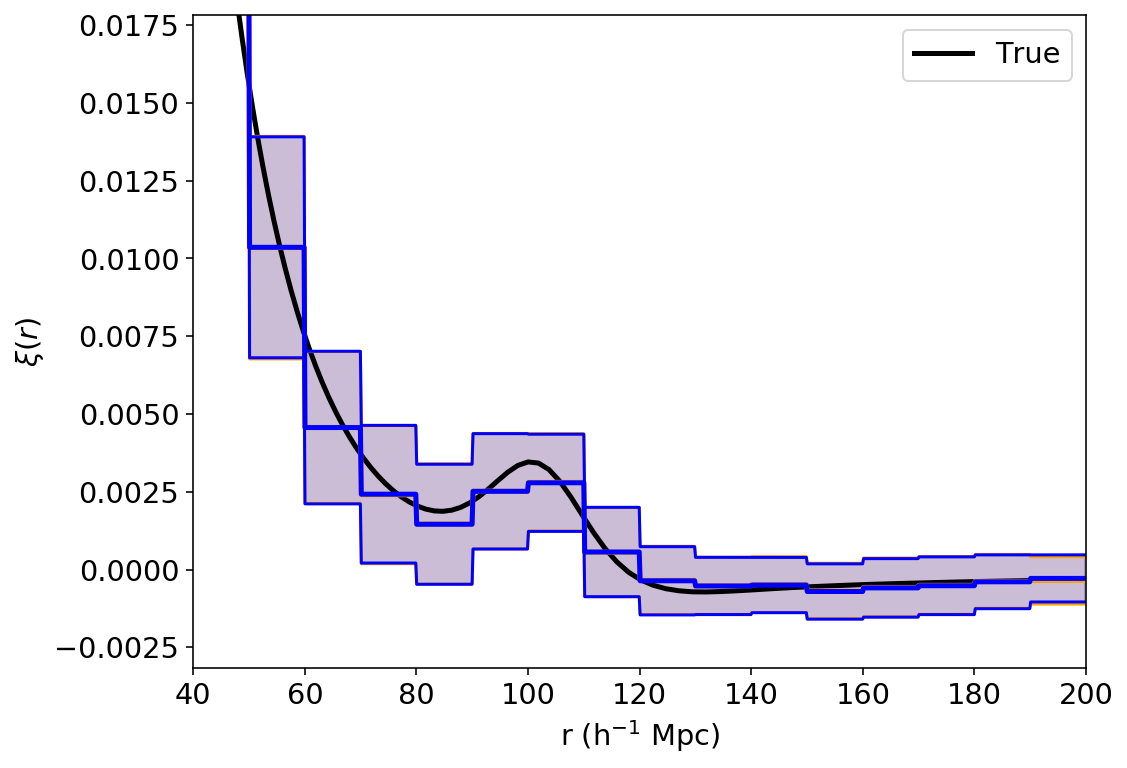

In [52]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_spline0_bw10', '_tophat_bw10']
labels = cf_tags
colors = ['orange', 'blue']
Nrealizations = 45

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        if Nr==46:
            continue
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

In [65]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory', '_tophat_bw10']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 10

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

(2, 10)


ValueError: operands could not be broadcast together with shapes (64,) (1000,) 

(100, 16)
(1, 16)
(1, 16)
(1, 16)
rmse: True
plotting


(-0.0008274009537814209, 0.021002879269642838)

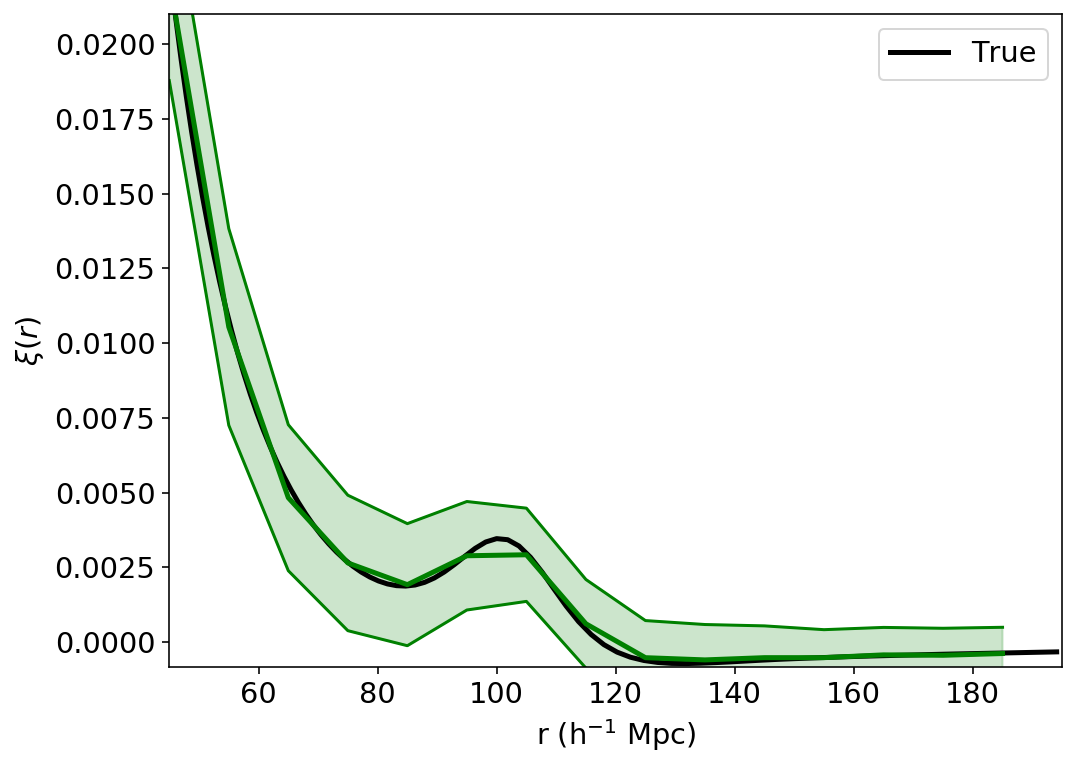

In [70]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory_bw10']
labels = cf_tags
colors = ['green']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

(-0.001831478492277605, 0.020358239073194673)

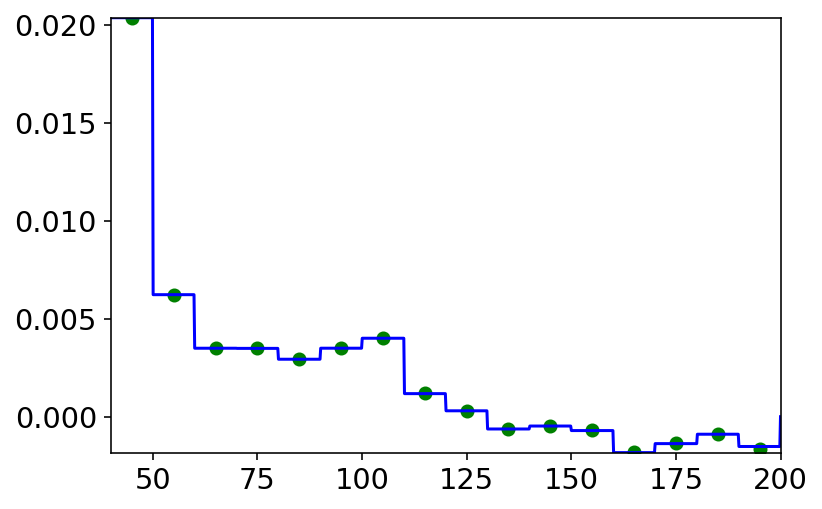

In [75]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory_bw10', '_tophat_bw10']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
        
        if "theory" in cf_tags[i]:
            plt.plot(r_avg, xi, color=colors[i], marker='o', ls='None')
        else:
            plt.plot(r_avg, xi, color=colors[i])


            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

(-0.0008365369486167396, 0.021026480444039874)

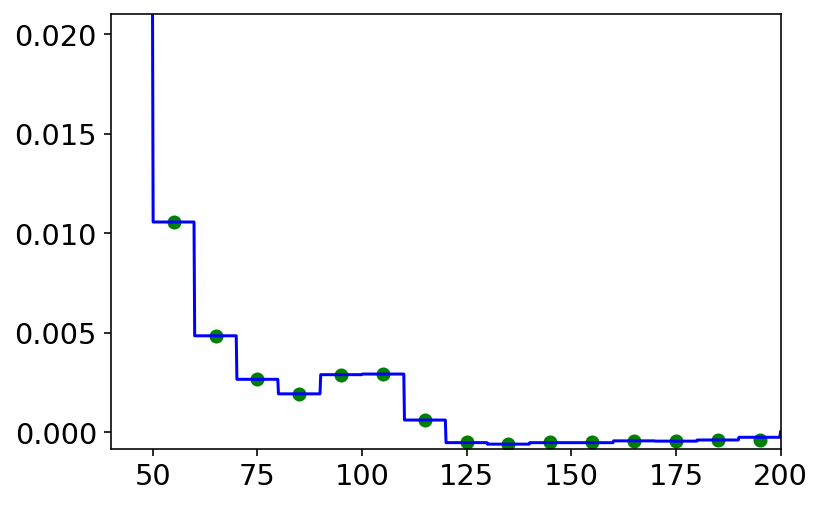

In [78]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory_bw10', '_tophat_bw10']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
        
    if "theory" in cf_tags[i]:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i], marker='o', ls='None')
    else:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i])
            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

(-0.0029538897837879663, 0.005)

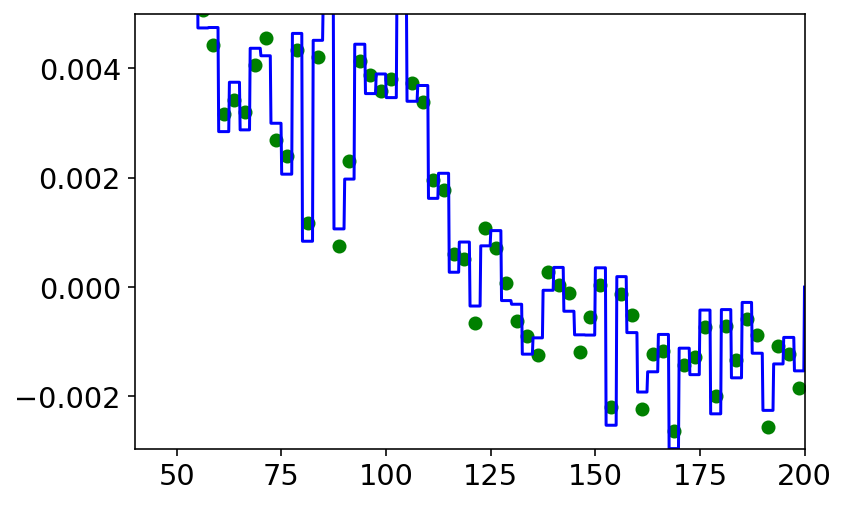

In [84]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory', '_tophat_bw2.5']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
        
    if "theory" in cf_tags[i]:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i], marker='o', ls='None')
    else:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i])
            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), 0.005)

(-0.0019257753403116862, 0.005)

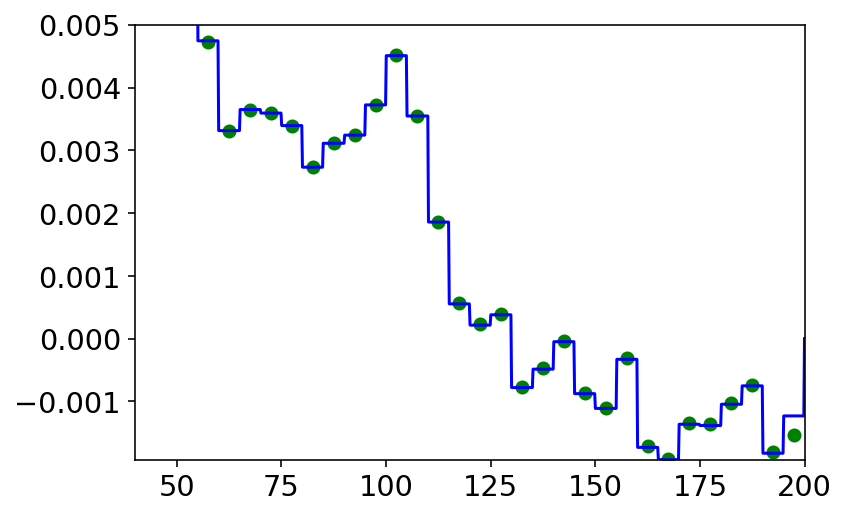

In [85]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory_bw5', '_tophat_bw5']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
        
    if "theory" in cf_tags[i]:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i], marker='o', ls='None')
    else:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i])
            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), 0.005)

(-0.0023764529819444435, 0.005)

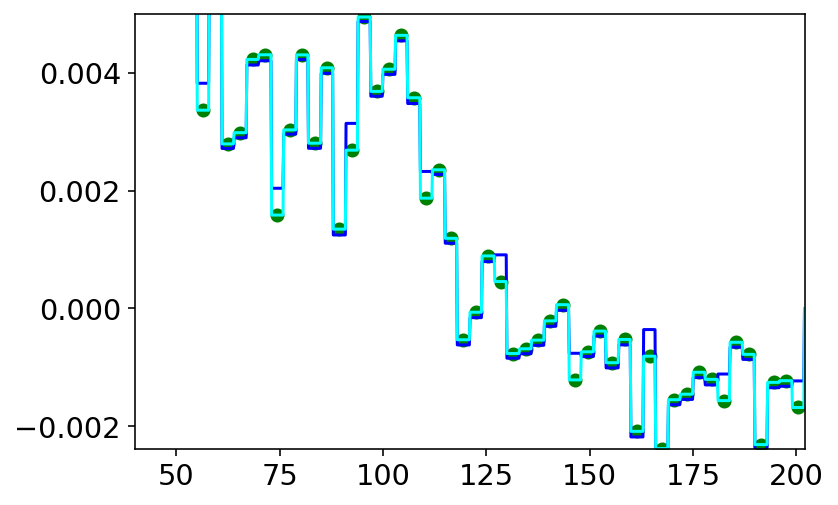

In [22]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory_bw3', '_tophat_bw3', '_tophat_bw3_adaptive5']#, '_tophat_bw3_adaptive1']
labels = cf_tags
colors = ['green', 'blue', 'cyan']#, 'purple']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
        
    if "theory" in cf_tags[i]:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i], marker='o', ls='None')
    else:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i])
            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), 0.005)

(-0.0023764529819444435, 0.005)

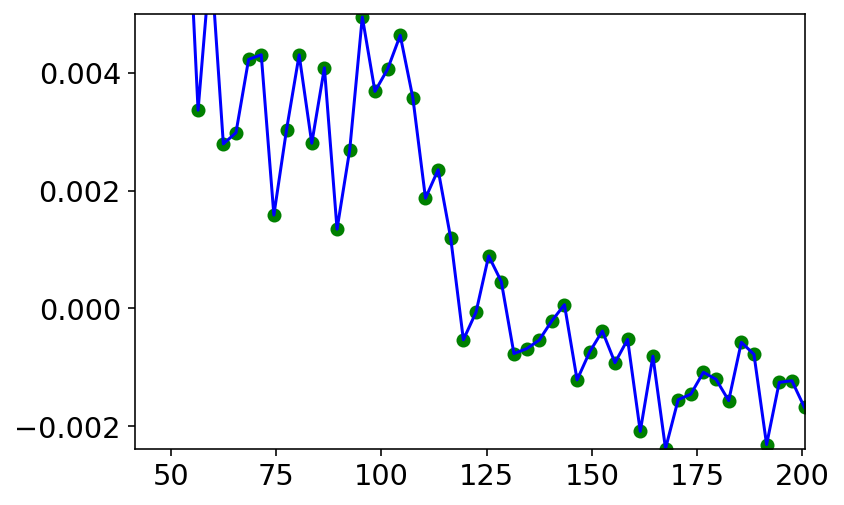

In [8]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_theory_bw3', '_tophat_bw3_adaptive']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
        
    if "theory" in cf_tags[i]:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i], marker='o', ls='None')
    else:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i])
            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), 0.005)

320 320
1000 1000


(-0.004749027789148319, 0.005)

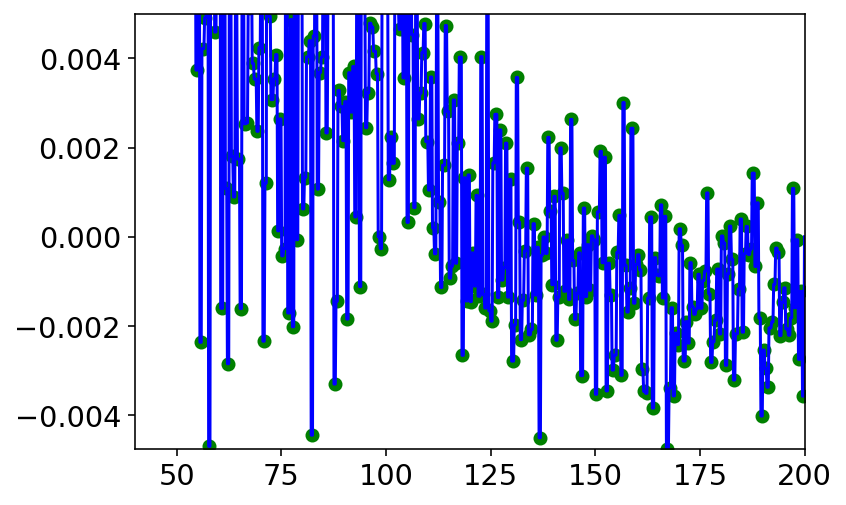

In [19]:
cat_tag = '_L750_n1e-4'

bw = 0.5
cf_tags = [f'_theory_bw{bw}', f'_tophat_bw{bw}_adaptive1']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
        print(len(r_avg), len(xi))
    
    if "theory" in cf_tags[i]:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i], marker='o', ls='None')
    else:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i])
            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), 0.005)

(2, 100)


ValueError: operands could not be broadcast together with shapes (64,) (1000,) 

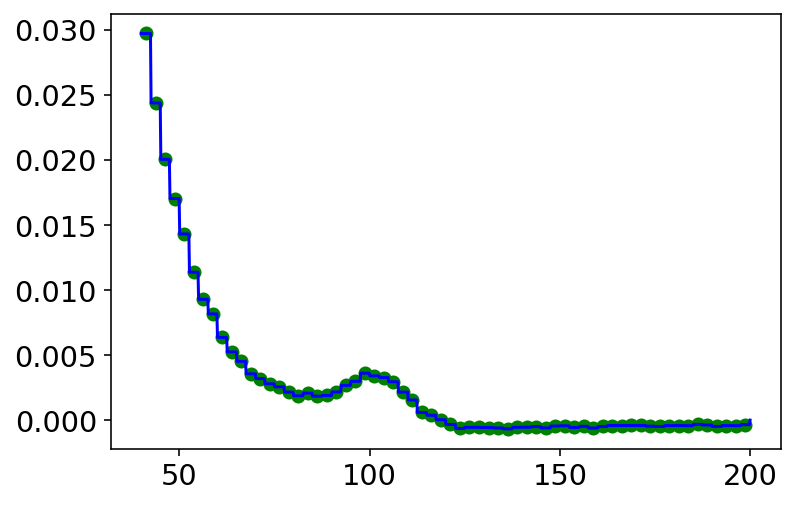

In [27]:
cat_tag = '_L750_n1e-4'

bw = 2.5
cf_tags = [f'_theory_bw{bw}', f'_tophat_bw{bw}']
labels = cf_tags
colors = ['green', 'blue']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    
    if "theory" in cf_tags[i]:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i], marker='o', ls='None')
    else:
        plt.plot(r_avg, np.mean(xis, axis=0), color=colors[i])
            
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

#plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), 0.005)

In [3]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_tophat_bw2.5', '_tophat_bw5', '_tophat_bw10']#, '_tophat_bw20']
labels = cf_tags
colors = ['cyan', 'blue', 'magenta']#, 'purple']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))

FileNotFoundError: [Errno 2] No such file or directory: '../results/results_lognormal_L750_n1e-4/cf_tophat_bw5_L750_n1e-4_rlz43.npy'

(100, 1000)
(100, 1000)
(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.0045663838384532715, 0.03253068702881934)

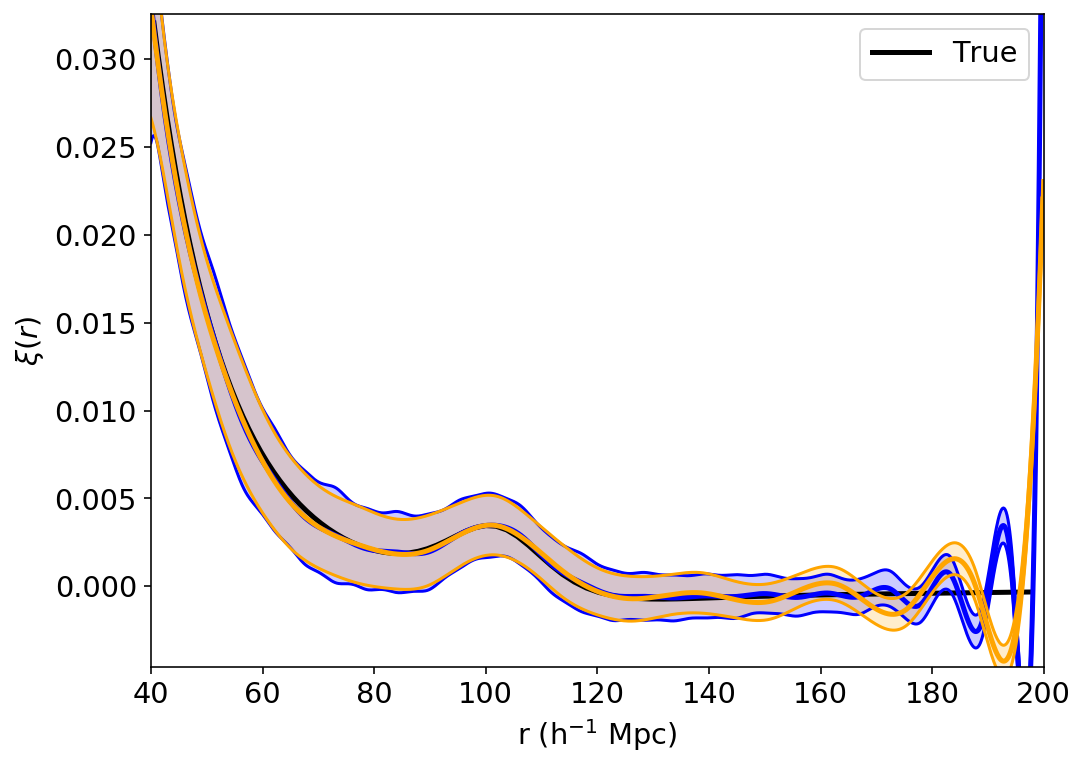

In [6]:
cat_tag = '_L750_n1e-4'

cf_tags = [ '_spline3_bw5', '_spline3_bw10']
labels = cf_tags
colors = ['blue','orange']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

In [21]:
cat_tag = '_L750_n1e-4'

cf_tags = [ '_tophat_bw5', '_spline3_bw15']
labels = cf_tags
colors = ['blue','orange']
Nrealizations = 50

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(xi), max(xi))

FileNotFoundError: [Errno 2] No such file or directory: '../results/results_lognormal_L750_n1e-4/cf_spline3_bw15_L750_n1e-4_rlz0.npy'

['bin width 1.25', 'bin width 2.5', 'bin width 5', 'bin width 10', 'bin width 20']
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(100, 1000)
(5, 1000)
(5, 1000)
(5, 1000)
rmse: True
plotting


(-0.004371226262077643, 0.012015849145112334)

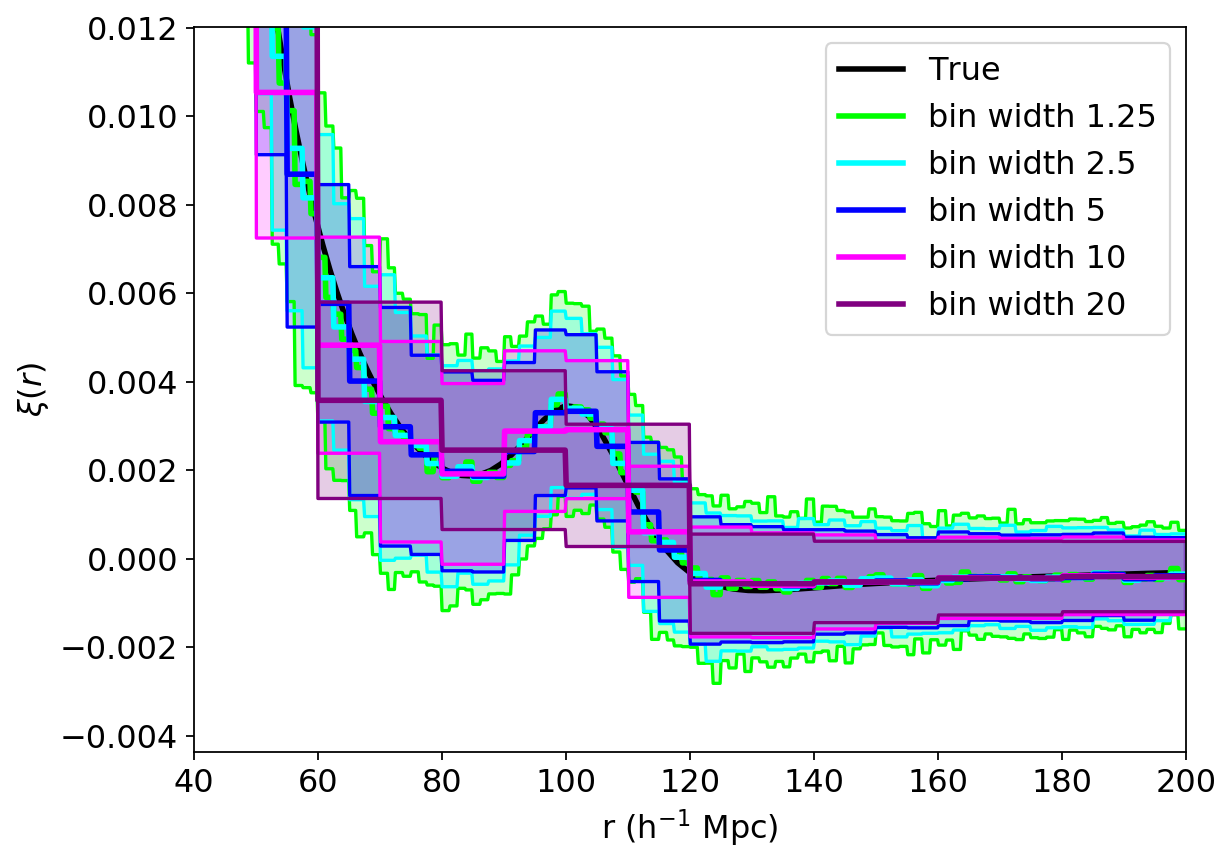

In [47]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_tophat_bw1.25', '_tophat_bw2.5', '_tophat_bw5', '_tophat_bw10', '_tophat_bw20']
labels = [f"bin width {tag.split('bw')[-1]}" for tag in cf_tags]
print(labels)
#labels = ['hi', 'hi', 'hi', 'hi']
colors = ['lime','cyan', 'blue', 'magenta', 'purple']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))

['bin width 5', 'bin width 10']
(100, 1000)
(100, 1000)
(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.006087177244983864, 0.03253068702881934)

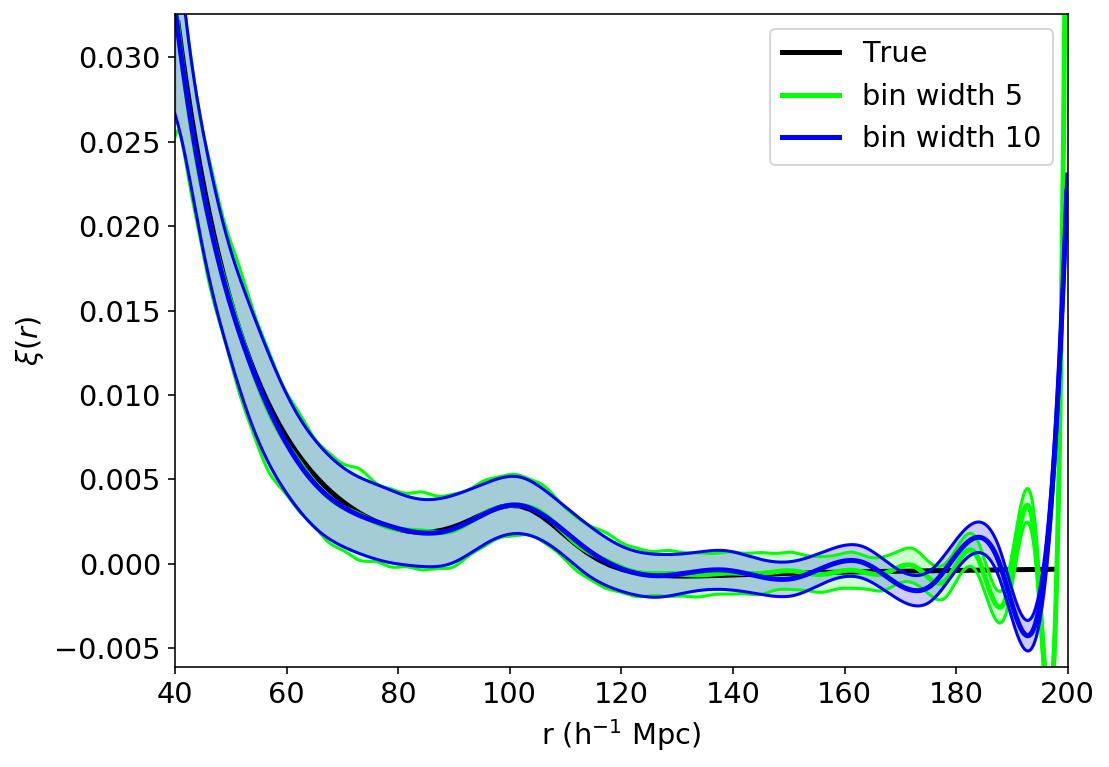

In [4]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_spline3_bw5', '_spline3_bw10']#, '_spline3_bw20']
labels = [f"bin width {tag.split('bw')[-1]}" for tag in cf_tags]
print(labels)
#labels = ['hi', 'hi', 'hi', 'hi']
colors = ['lime','blue', 'cyan', 'magenta', 'purple']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))

['bin width 10', 'bin width 10_qqnum']
(1, 1000)
(1, 1000)
(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.0018097079423557902, 0.021582560108071594)

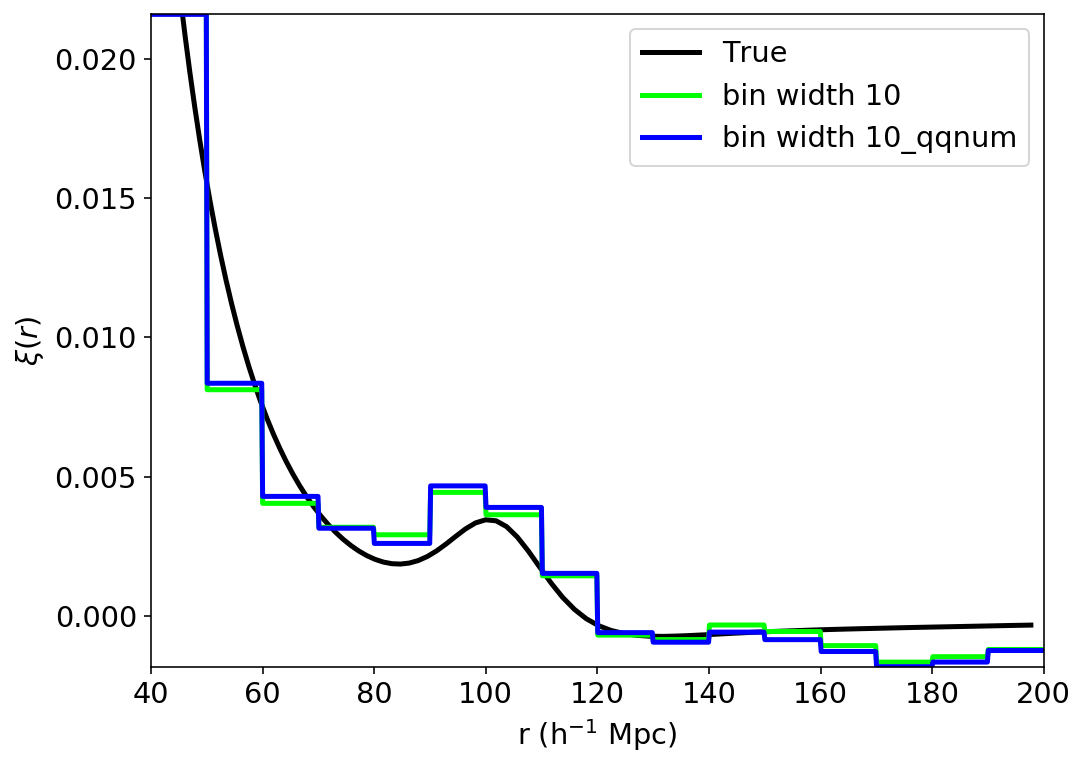

In [9]:
cat_tag = '_L750_n3e-4'

cf_tags = ['_tophat_bw10', '_tophat_bw10_qqnum']#, '_spline3_bw20']
labels = [f"bin width {tag.split('bw')[-1]}" for tag in cf_tags]
print(labels)
colors = ['lime','blue', 'cyan', 'magenta', 'purple']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))

['bin width 10', 'bin width 10_qqnum', 'bin width 10_numerator']
(1, 1000)
(1, 1000)
(1, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
rmse: True
plotting


(-0.0017348048273348523, 0.03008126730326763)

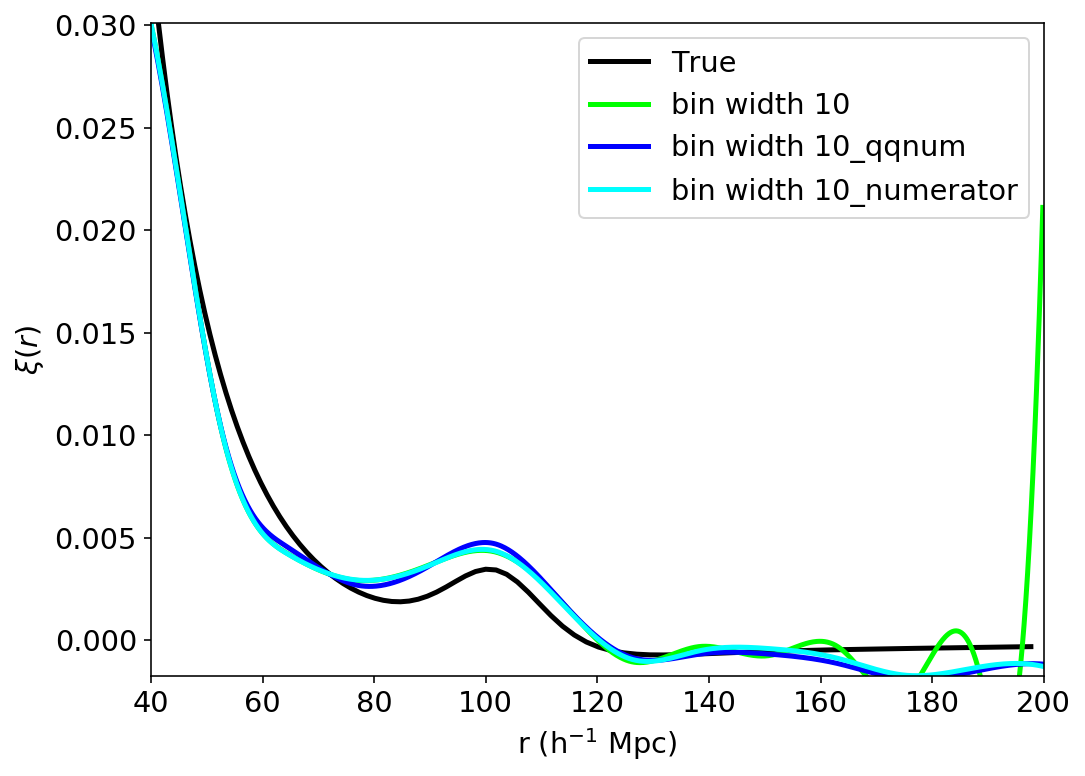

In [5]:
cat_tag = '_L750_n3e-4'

cf_tags = ['_spline3_bw10', '_spline3_bw10_qqnum', '_spline3_bw10_numerator']#, '_spline3_bw20']
labels = [f"bin width {tag.split('bw')[-1]}" for tag in cf_tags]
print(labels)
colors = ['lime','blue', 'cyan', 'magenta', 'purple']
Nrealizations = 1

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))

['bin width 10', 'bin width 10_qqnum']
(100, 1000)
(100, 1000)
(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.004819743662968213, 0.03483564235620333)

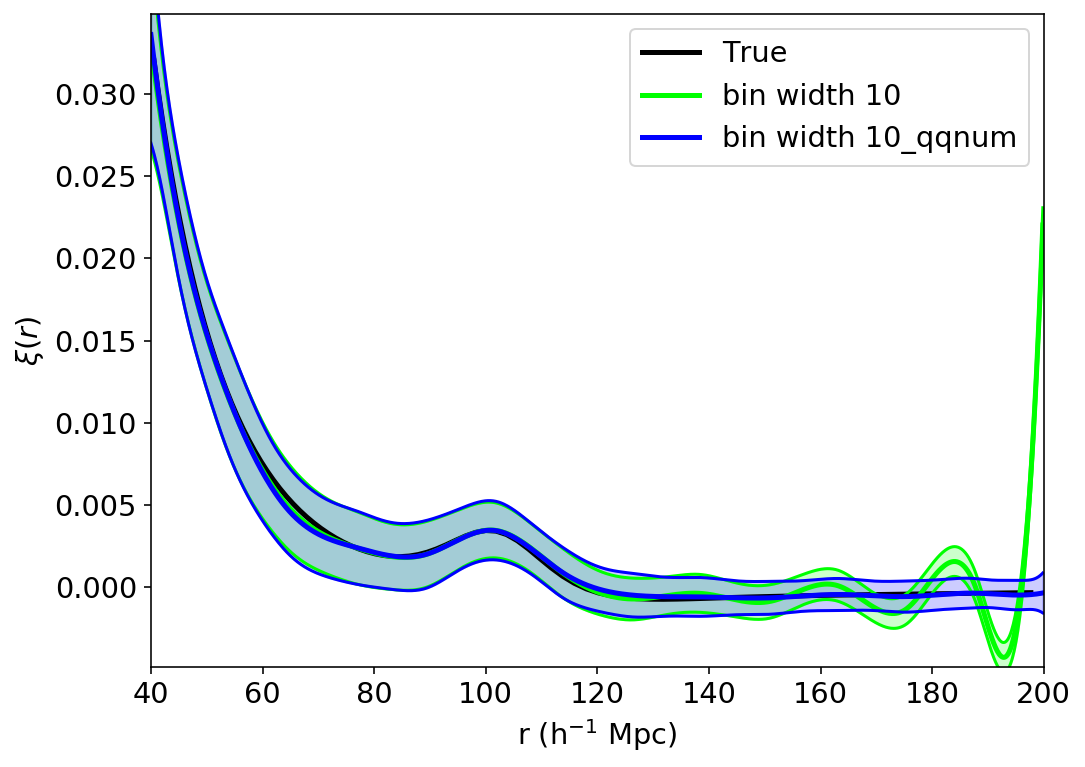

In [14]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_spline3_bw10', '_spline3_bw10_qqnum']#, '_spline3_bw20']
labels = [f"bin width {tag.split('bw')[-1]}" for tag in cf_tags]
print(labels)
colors = ['lime','blue', 'cyan', 'magenta', 'purple']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))

['bin width 2.5', 'bin width 10_qqnum']
(100, 1000)
(100, 1000)
(2, 1000)
(2, 1000)
(2, 1000)
rmse: True
plotting


(-0.004819743662968213, 0.03483564235620333)

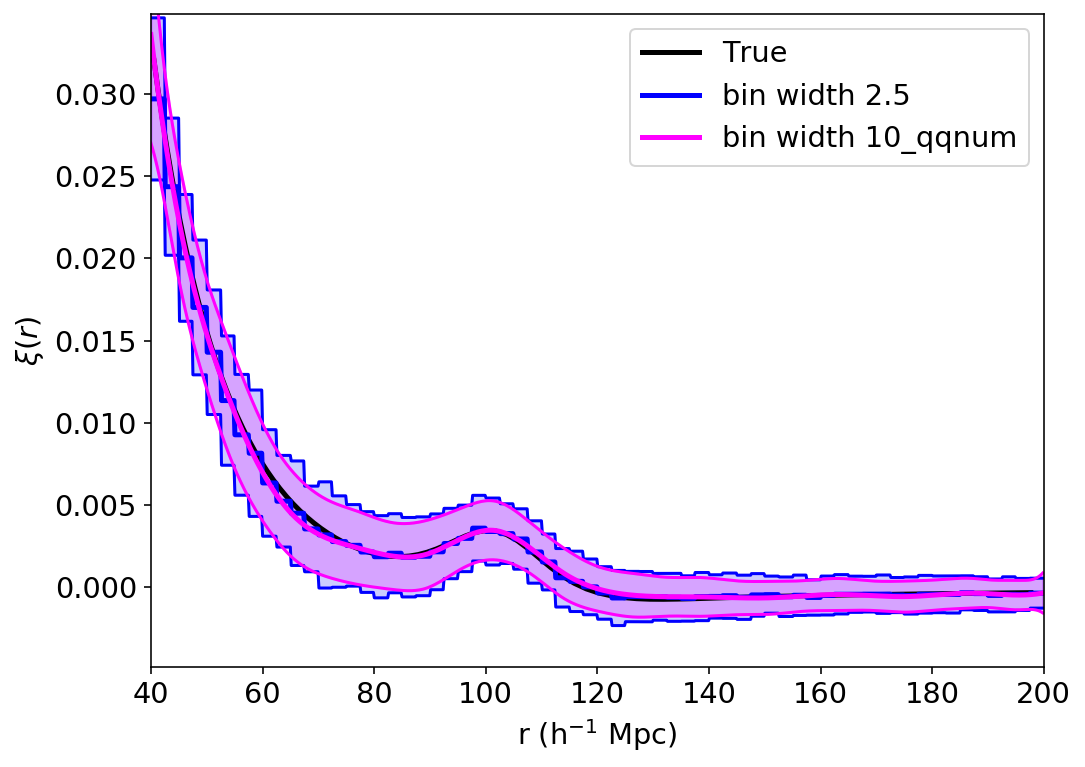

In [25]:
cat_tag = '_L750_n1e-4'

cf_tags = ['_tophat_bw2.5', '_spline3_bw10_qqnum']#, '_spline3_bw20']
labels = [f"bin width {tag.split('bw')[-1]}" for tag in cf_tags]
print(labels)
colors = ['blue','magenta']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))

['bin width 2.5', 'bin width 10', 'bin width 10_qqnum']
(100, 1000)
(100, 1000)
(100, 1000)
(3, 1000)
(3, 1000)
(3, 1000)
rmse: True
plotting


(-0.012347358974464264, 0.03603829027632576)

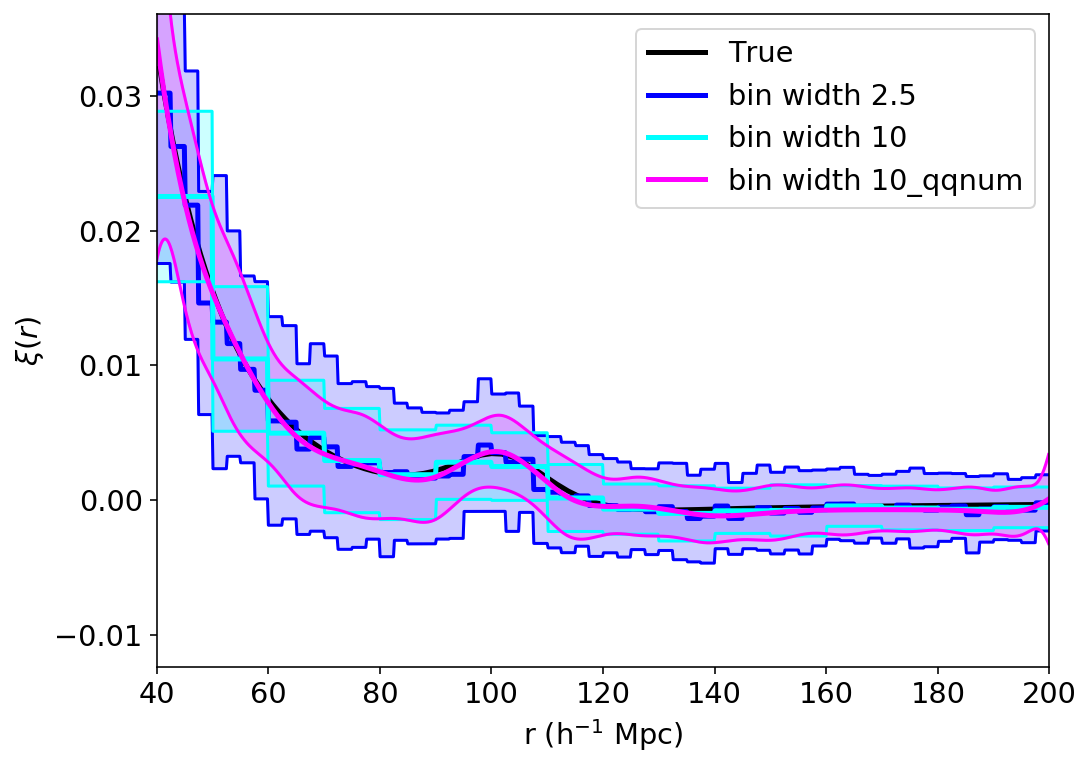

In [26]:
cat_tag = '_L750_n3e-5'

cf_tags = ['_tophat_bw2.5', '_tophat_bw10', '_spline3_bw10_qqnum']#, '_spline3_bw20']
labels = [f"bin width {tag.split('bw')[-1]}" for tag in cf_tags]
print(labels)
colors = ['blue', 'cyan', 'magenta']
Nrealizations = 100

cat_dir = '../catalogs'
result_dir = '../results/results_lognormal{}'.format(cat_tag)

rs = []
cf_arrs = []

for i in range(len(cf_tags)):
    xis = []
    for Nr in range(Nrealizations):
        cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
        r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
        xis.append(xi)
    rs.append(r_avg)
    cf_arrs.append(xis)     
    
# true
true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
r_true, xi_true = np.loadtxt(true_fn, unpack=True)
b1 = 1.5    
xi_true *= b1**2

plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors)

plt.xlim(min(r_avg), max(r_avg))
plt.ylim(min(np.array(xis).flatten()), max(xi))